In [46]:
import pandas_datareader as pdr
import datetime
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2016-10-01", end_date="2017-01-01")

In [47]:
# Return first rows of `aapl`
aapl.head()

# Return last rows of `aapl`
aapl.tail()

# Describe `aapl`
aapl.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,63.000000,63.000000,63.000000,63.000000,6.300000e+01,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,6.300000e+01
mean,113.263889,114.160478,112.491656,113.399048,3.201970e+07,0.009048,1.0,111.649978,112.534295,110.888897,111.783673,3.201970e+07
std,3.295525,3.098333,3.476164,3.220831,1.167818e+07,0.071813,0.0,3.116875,2.931202,3.309699,3.057021,1.167818e+07
min,106.570000,107.680000,104.080000,105.710000,1.147592e+07,0.000000,1.0,105.253705,106.349995,102.794460,104.404327,1.147592e+07
25%,110.572500,111.485000,109.680000,110.955000,2.445596e+07,0.000000,1.0,109.206768,110.107997,108.325292,109.527444,2.445596e+07
50%,113.460000,114.340000,112.690000,113.540000,2.852875e+07,0.000000,1.0,111.666724,112.344683,111.100584,111.735503,2.852875e+07
75%,116.495000,117.154750,115.682500,116.560000,3.590722e+07,0.000000,1.0,114.866807,115.361109,114.191951,114.896131,3.590722e+07
max,118.180000,118.690000,117.450000,118.250000,6.613422e+07,0.570000,1.0,116.117672,116.618772,115.400411,116.186451,6.613422e+07


Save and read data

In [48]:
import pandas as pd
aapl.to_csv('BasicPythonFinance/data/aapl_ohlc.csv')
df = pd.read_csv('BasicPythonFinance/data/aapl_ohlc.csv', header=0, index_col='Date', parse_dates=True)

In [49]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [51]:
# Inspect the first rows of November-December 2010
print(aapl.loc[pd.Timestamp('2010-11-01'):pd.Timestamp('2010-12-31')].head())

# Inspect the first rows of 2011
print(aapl.loc['2016'].head())

# Inspect November 2010
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2010-11-01 and 2010-12-01
print(aapl.iloc[[22,43], [0, 3]])

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Ex-Dividend, Split Ratio, Adj. Open, Adj. High, Adj. Low, Adj. Close, Adj. Volume]
Index: []
              Open    High     Low   Close      Volume  Ex-Dividend  \
Date                                                                  
2016-10-03  112.71  113.05  112.28  112.52  21701760.0          0.0   
2016-10-04  113.06  114.31  112.63  113.00  29736835.0          0.0   
2016-10-05  113.40  113.66  112.69  113.05  21453089.0          0.0   
2016-10-06  113.70  114.34  113.13  113.89  28779313.0          0.0   
2016-10-07  114.31  114.56  113.51  114.06  24358443.0          0.0   

            Split Ratio   Adj. Open   Adj. High    Adj. Low  Adj. Close  \
Date                                                                      
2016-10-03          1.0  110.743128  111.077195  110.320632  110.556443   
2016-10-04          1.0  111.087020  112.315207  110.664524  111.028067   
2016-10-05          1.0  111.421087  111.676550  11

In [52]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M').mean()

# Print `monthly_aapl`
print(monthly_aapl)

              Open    High     Low   Close      Volume  Ex-Dividend  \
Date                                                                  
2016-12-14  115.04  116.20  114.98  115.19  34031834.0          0.0   
2016-11-16  106.70  110.23  106.60  109.99  58840522.0          0.0   
2016-11-10  111.09  111.09  105.83  107.79  57134541.0          0.0   
2016-12-09  112.31  114.70  112.31  113.95  34402627.0          0.0   
2016-10-17  117.33  117.84  116.78  117.55  23624896.0          0.0   
2016-11-04  108.53  110.25  108.11  108.84  30836997.0          0.0   
2016-12-23  115.59  116.52  115.59  116.52  14249484.0          0.0   
2016-10-13  116.79  117.44  115.72  116.98  35192406.0          0.0   
2016-11-22  111.95  112.42  111.40  111.80  25965534.0          0.0   
2016-12-27  116.52  117.80  116.49  117.26  18296855.0          0.0   
2016-11-02  111.40  112.35  111.23  111.59  28331709.0          0.0   
2016-12-02  109.17  110.09  108.85  109.90  26527997.0          0.0   
2016-1

In [53]:
aapl.asfreq("M", method="bfill")

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-10-31,113.65,114.23,113.20,113.54,26419398.0,0.0,1.0,111.666724,112.236603,111.224577,111.558644,26419398.0
2016-11-30,111.56,112.20,110.27,110.52,36162258.0,0.0,1.0,110.182071,110.814166,108.908004,109.154917,36162258.0


In [54]:
# Add a column 'diff' to 'aapl' 
aapl['diff'] = aapl.Open - aapl.Close

print(aapl)

               Open      High      Low   Close      Volume  Ex-Dividend  \
Date                                                                      
2016-10-03  112.710  113.0500  112.280  112.52  21701760.0         0.00   
2016-10-04  113.060  114.3100  112.630  113.00  29736835.0         0.00   
2016-10-05  113.400  113.6600  112.690  113.05  21453089.0         0.00   
2016-10-06  113.700  114.3400  113.130  113.89  28779313.0         0.00   
2016-10-07  114.310  114.5600  113.510  114.06  24358443.0         0.00   
2016-10-10  115.020  116.7500  114.720  116.05  36235956.0         0.00   
2016-10-11  117.700  118.6900  116.200  116.30  64041043.0         0.00   
2016-10-12  117.350  117.9800  116.750  117.34  37586787.0         0.00   
2016-10-13  116.790  117.4400  115.720  116.98  35192406.0         0.00   
2016-10-14  117.880  118.1700  117.130  117.63  35652191.0         0.00   
2016-10-17  117.330  117.8400  116.780  117.55  23624896.0         0.00   
2016-10-18  118.180  118.

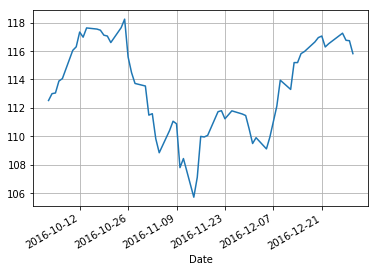

In [55]:
# Import Matplotlib's 'pyplot' module as 'plt'
import matplotlib.pyplot as plt

# Plot the closing prices for 'aapl'
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

Show daily:

In [56]:
# Import 'numpy' as 'np'
import numpy as np

# Assign 'Adj. Close' to 'daily_close'
daily_close = []
daily_close = aapl[[ 'Adj. Close' ]]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj. Close
Date                  
2016-10-03    0.000000
2016-10-04    0.004266
2016-10-05    0.000442
2016-10-06    0.007430
2016-10-07    0.001493
2016-10-10    0.017447
2016-10-11    0.002154
2016-10-12    0.008942
2016-10-13   -0.003068
2016-10-14    0.005557
2016-10-17   -0.000680
2016-10-18   -0.000681
2016-10-19   -0.002979
2016-10-20   -0.000512
2016-10-21   -0.003930
2016-10-24    0.009005
2016-10-25    0.005100
2016-10-26   -0.022495
2016-10-27   -0.009603
2016-10-28   -0.006639
2016-10-31   -0.001583
2016-11-01   -0.018055
2016-11-02    0.000897
2016-11-03   -0.010664
2016-11-04   -0.009014
2016-11-07    0.014425
2016-11-08    0.005887
2016-11-09   -0.001621
2016-11-10   -0.027868
2016-11-11    0.005937
...                ...
2016-11-17   -0.000364
2016-11-18    0.001000
2016-11-21    0.015174
2016-11-22    0.000627
2016-11-23   -0.005098
2016-11-25    0.005035
2016-11-28   -0.001968
2016-11-29   -0.000986
2016-11-30   -0.008434
2016-12-01   -0.009320
2016-12-02 

Show monthly and quarter:

In [57]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,diff
Date,,,,,,,,,,,,,
2016-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28,-0.032139,-0.028709,-0.03197,-0.029922,-0.031665,inf,0.0,-0.027356,-0.023909,-0.027184,-0.025125,-0.031665,-7.029221


In [58]:
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
print(daily_pct_change)

            Adj. Close
Date                  
2016-10-03         NaN
2016-10-04    0.004266
2016-10-05    0.000442
2016-10-06    0.007430
2016-10-07    0.001493
2016-10-10    0.017447
2016-10-11    0.002154
2016-10-12    0.008942
2016-10-13   -0.003068
2016-10-14    0.005557
2016-10-17   -0.000680
2016-10-18   -0.000681
2016-10-19   -0.002979
2016-10-20   -0.000512
2016-10-21   -0.003930
2016-10-24    0.009005
2016-10-25    0.005100
2016-10-26   -0.022495
2016-10-27   -0.009603
2016-10-28   -0.006639
2016-10-31   -0.001583
2016-11-01   -0.018055
2016-11-02    0.000897
2016-11-03   -0.010664
2016-11-04   -0.009014
2016-11-07    0.014425
2016-11-08    0.005887
2016-11-09   -0.001621
2016-11-10   -0.027868
2016-11-11    0.005937
...                ...
2016-11-17   -0.000364
2016-11-18    0.001000
2016-11-21    0.015174
2016-11-22    0.000627
2016-11-23   -0.005098
2016-11-25    0.005035
2016-11-28   -0.001968
2016-11-29   -0.000986
2016-11-30   -0.008434
2016-12-01   -0.009320
2016-12-02 

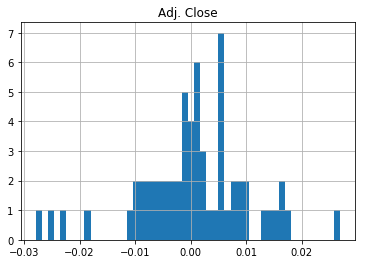

       Adj. Close
count   62.000000
mean     0.000598
std      0.009874
min     -0.027868
25%     -0.004180
50%      0.000762
75%      0.005860
max      0.026888


In [59]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

In [60]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj. Close
Date                  
2016-10-03         NaN
2016-10-04    1.004266
2016-10-05    1.004710
2016-10-06    1.012176
2016-10-07    1.013686
2016-10-10    1.031372
2016-10-11    1.033594
2016-10-12    1.042837
2016-10-13    1.039637
2016-10-14    1.045414
2016-10-17    1.044703
2016-10-18    1.043992
2016-10-19    1.040882
2016-10-20    1.040348
2016-10-21    1.036260
2016-10-24    1.045592
2016-10-25    1.050924
2016-10-26    1.027284
2016-10-27    1.017419
2016-10-28    1.010665
2016-10-31    1.009065
2016-11-01    0.990846
2016-11-02    0.991735
2016-11-03    0.981159
2016-11-04    0.972315
2016-11-07    0.986340
2016-11-08    0.992147
2016-11-09    0.990539
2016-11-10    0.962935
2016-11-11    0.968652
...                ...
2016-11-17    0.982231
2016-11-18    0.983214
2016-11-21    0.998132
2016-11-22    0.998758
2016-11-23    0.993666
2016-11-25    0.998668
2016-11-28    0.996703
2016-11-29    0.995720
2016-11-30    0.987323
2016-12-01    0.978122
2016-12-02 

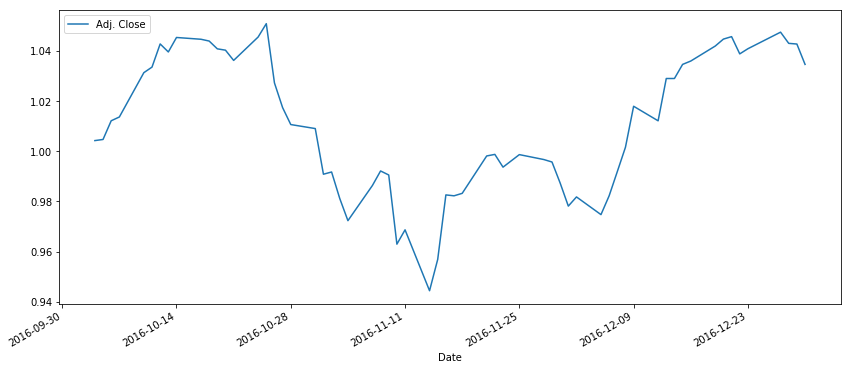

In [61]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(14,6))

# Show the plot
plt.show()

In [62]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the 'cum_monthly_return'
print(cum_monthly_return)

            Adj. Close
Date                  
2016-10-31    1.029741
2016-11-30    0.983566
2016-12-31    1.021410
